February: Real cases - Salinity cross-shore cross-sections with isohalines.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib import colors
from matplotlib import ticker

%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_vars_cross(dirname, x_ind):
    fname = "1_MCKNZ_1h_20170101_20170120_*"
    y = slice(1,-1,None)
    
    filesT = general_functions.get_files(dirname, fname, 'grid_T')
    filesU = general_functions.get_files(dirname, fname, 'grid_U')
            
    with scDataset(filesT) as dsT, scDataset(filesU) as dsU:
        vosaline0 = dsT.variables['vosaline'][:, :, y, x_ind]
        deptht = dsT.variables['deptht'][:]
        sozotaux = dsU.variables['sozotaux'][:,0,0]
        
    with nc.Dataset(os.path.join(dirname, '1_mesh_mask.nc'), 'r') as dsM:
        tmask0 = dsM.variables['tmask'][0, :, y, x_ind]
        
    tmask = np.tile(tmask0, (len(sozotaux), 1, 1, 1))  
    vosaline = np.ma.array(vosaline0, mask=1 - tmask)
    
    return vosaline, tmask, deptht

In [3]:
def get_1day_avg(sal, day_start, day_end):
    day = slice(day_start*24, day_end*24, None)
    sal_day = np.mean(sal[day, ...], axis=0)
    return sal_day

In [4]:
def plot_iso(vosaline_daily_ma, deptht, vmin, vmax, levels):
    xs = np.arange(vosaline_daily_ma.shape[-1])
    cmap = plt.get_cmap(cm.Spectral_r)
    cmap.set_bad('wheat')
    fig, axes = plt.subplots(6, 2, figsize = (20, 40))
    for ax, n in zip(axes.flatten(), np.arange(12)): 
        plot_array = vosaline_daily_ma[n, :, :]
        p = ax.pcolormesh(xs, deptht, plot_array, cmap=cmap, vmin=26, vmax=37)
        cs = ax.contour(xs, deptht, plot_array, colors = 'k', alpha=0.8, levels=levels)
        ax.set_ylim([deptht.max(), 0])
        ax.set_xlim([0, xs[-1]])
        fig.colorbar(p, ax=ax)
    return fig

# Salinity reference profile

In [5]:
vosaline_ref = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/salinity/salinity_for_agrif.nc')['vosaline'][:]
vosaline_ref_profile = vosaline_ref[0, :, 0, 0]

In [6]:
levels = np.sort(vosaline_ref_profile[:])[::2]

In [7]:
levels

array([ 22.19425201,  28.71079445,  29.93310547,  30.72694397,
        31.60148811,  32.28652573,  32.85224915,  33.4180603 ,
        33.74547577,  34.02747345,  34.2559967 ,  34.4551506 ,
        34.56965637,  34.67427826,  34.75435638,  34.82886505,
        34.86204147,  34.8960762 ,  34.91975784,  34.93091965,
        34.94955063,  34.96502686,  34.96596527,  34.9757843 ,
        34.97871399,  34.98160172,  34.98871613,  34.99358368,
        34.99643707,  34.99744034,  35.00040817,  35.00831985,
        35.01628494,  35.02328873,  35.02941513,  35.03532028,
        35.04141617,  35.04759598,  35.05363846,  35.06093216], dtype=float32)

# X index

In [8]:
x_ind = 110

# Real_half

In [9]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/real_half/'
vosaline, tmask, deptht = get_vars_cross(dirname, x_ind)

vosaline_daily = np.full((vosaline.shape[-3]/24, vosaline.shape[-2], vosaline.shape[-1]), np.nan)

for i in range(vosaline_daily.shape[0]):
    day_start, day_end = i, i+1
    vosaline_daily[i, :, :] = get_1day_avg(vosaline, day_start, day_end)

tmask_cross = np.tile(tmask[0, 0, :, :], (vosaline_daily.shape[0], 1, 1))

vosaline_daily_ma = np.ma.array(vosaline_daily, mask = 1 - tmask_cross)

22.2729008993 35.0610936483


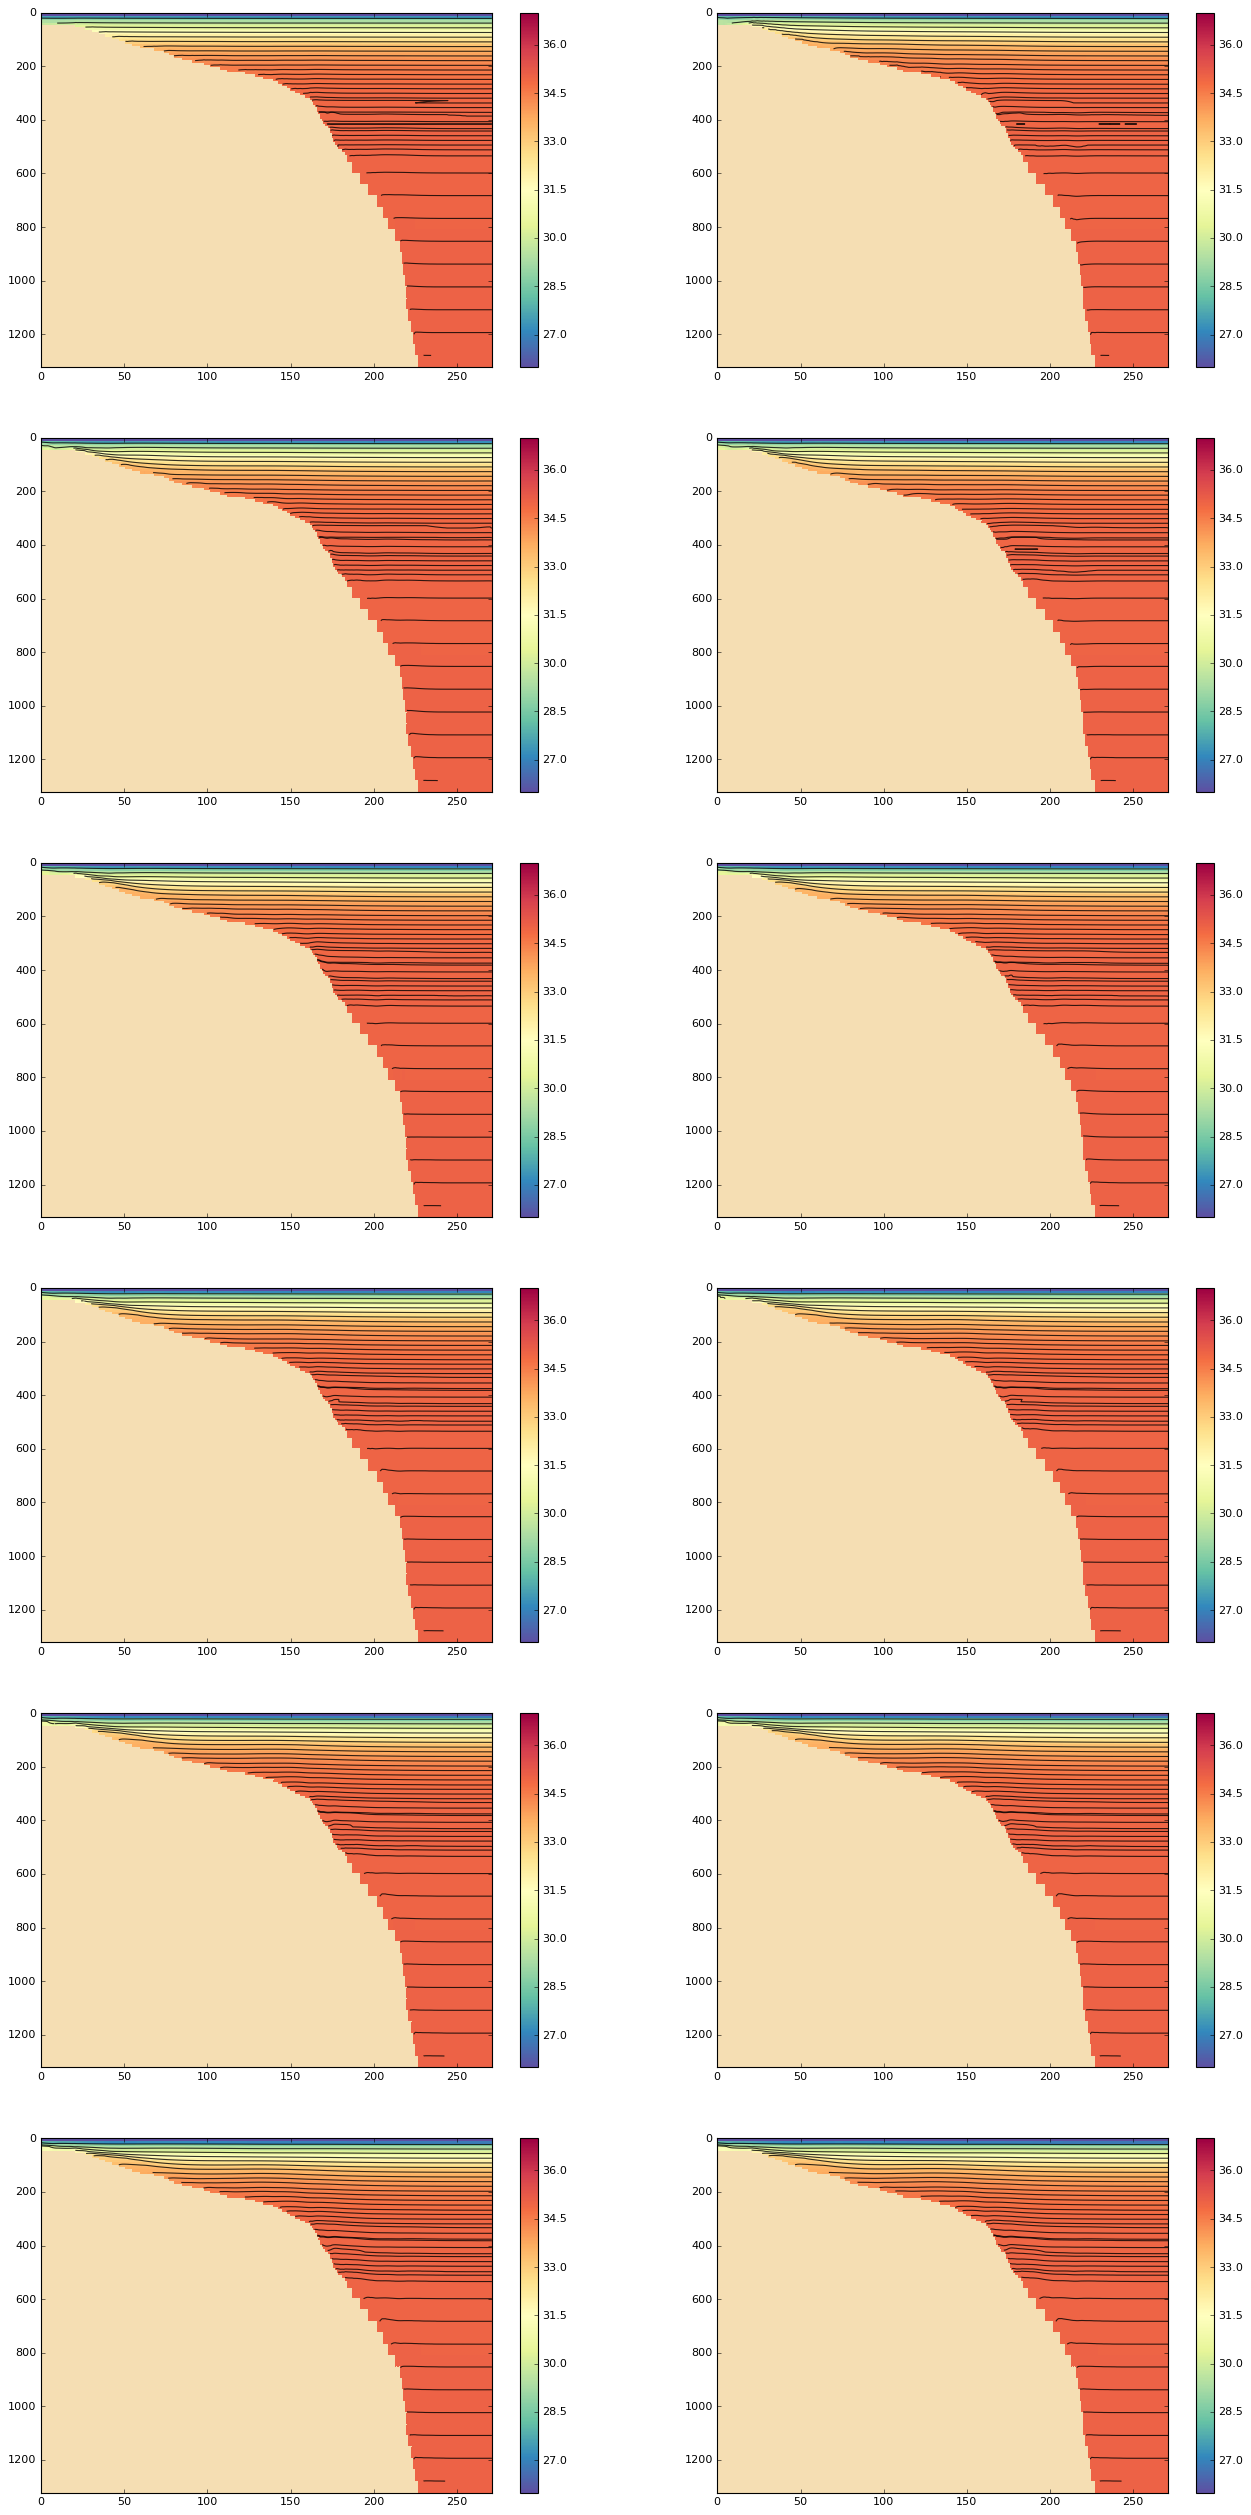

In [10]:
print(vosaline_daily_ma.min(), vosaline_daily_ma.max())

fig = plot_iso(vosaline_daily_ma, deptht, 26, 37, levels)

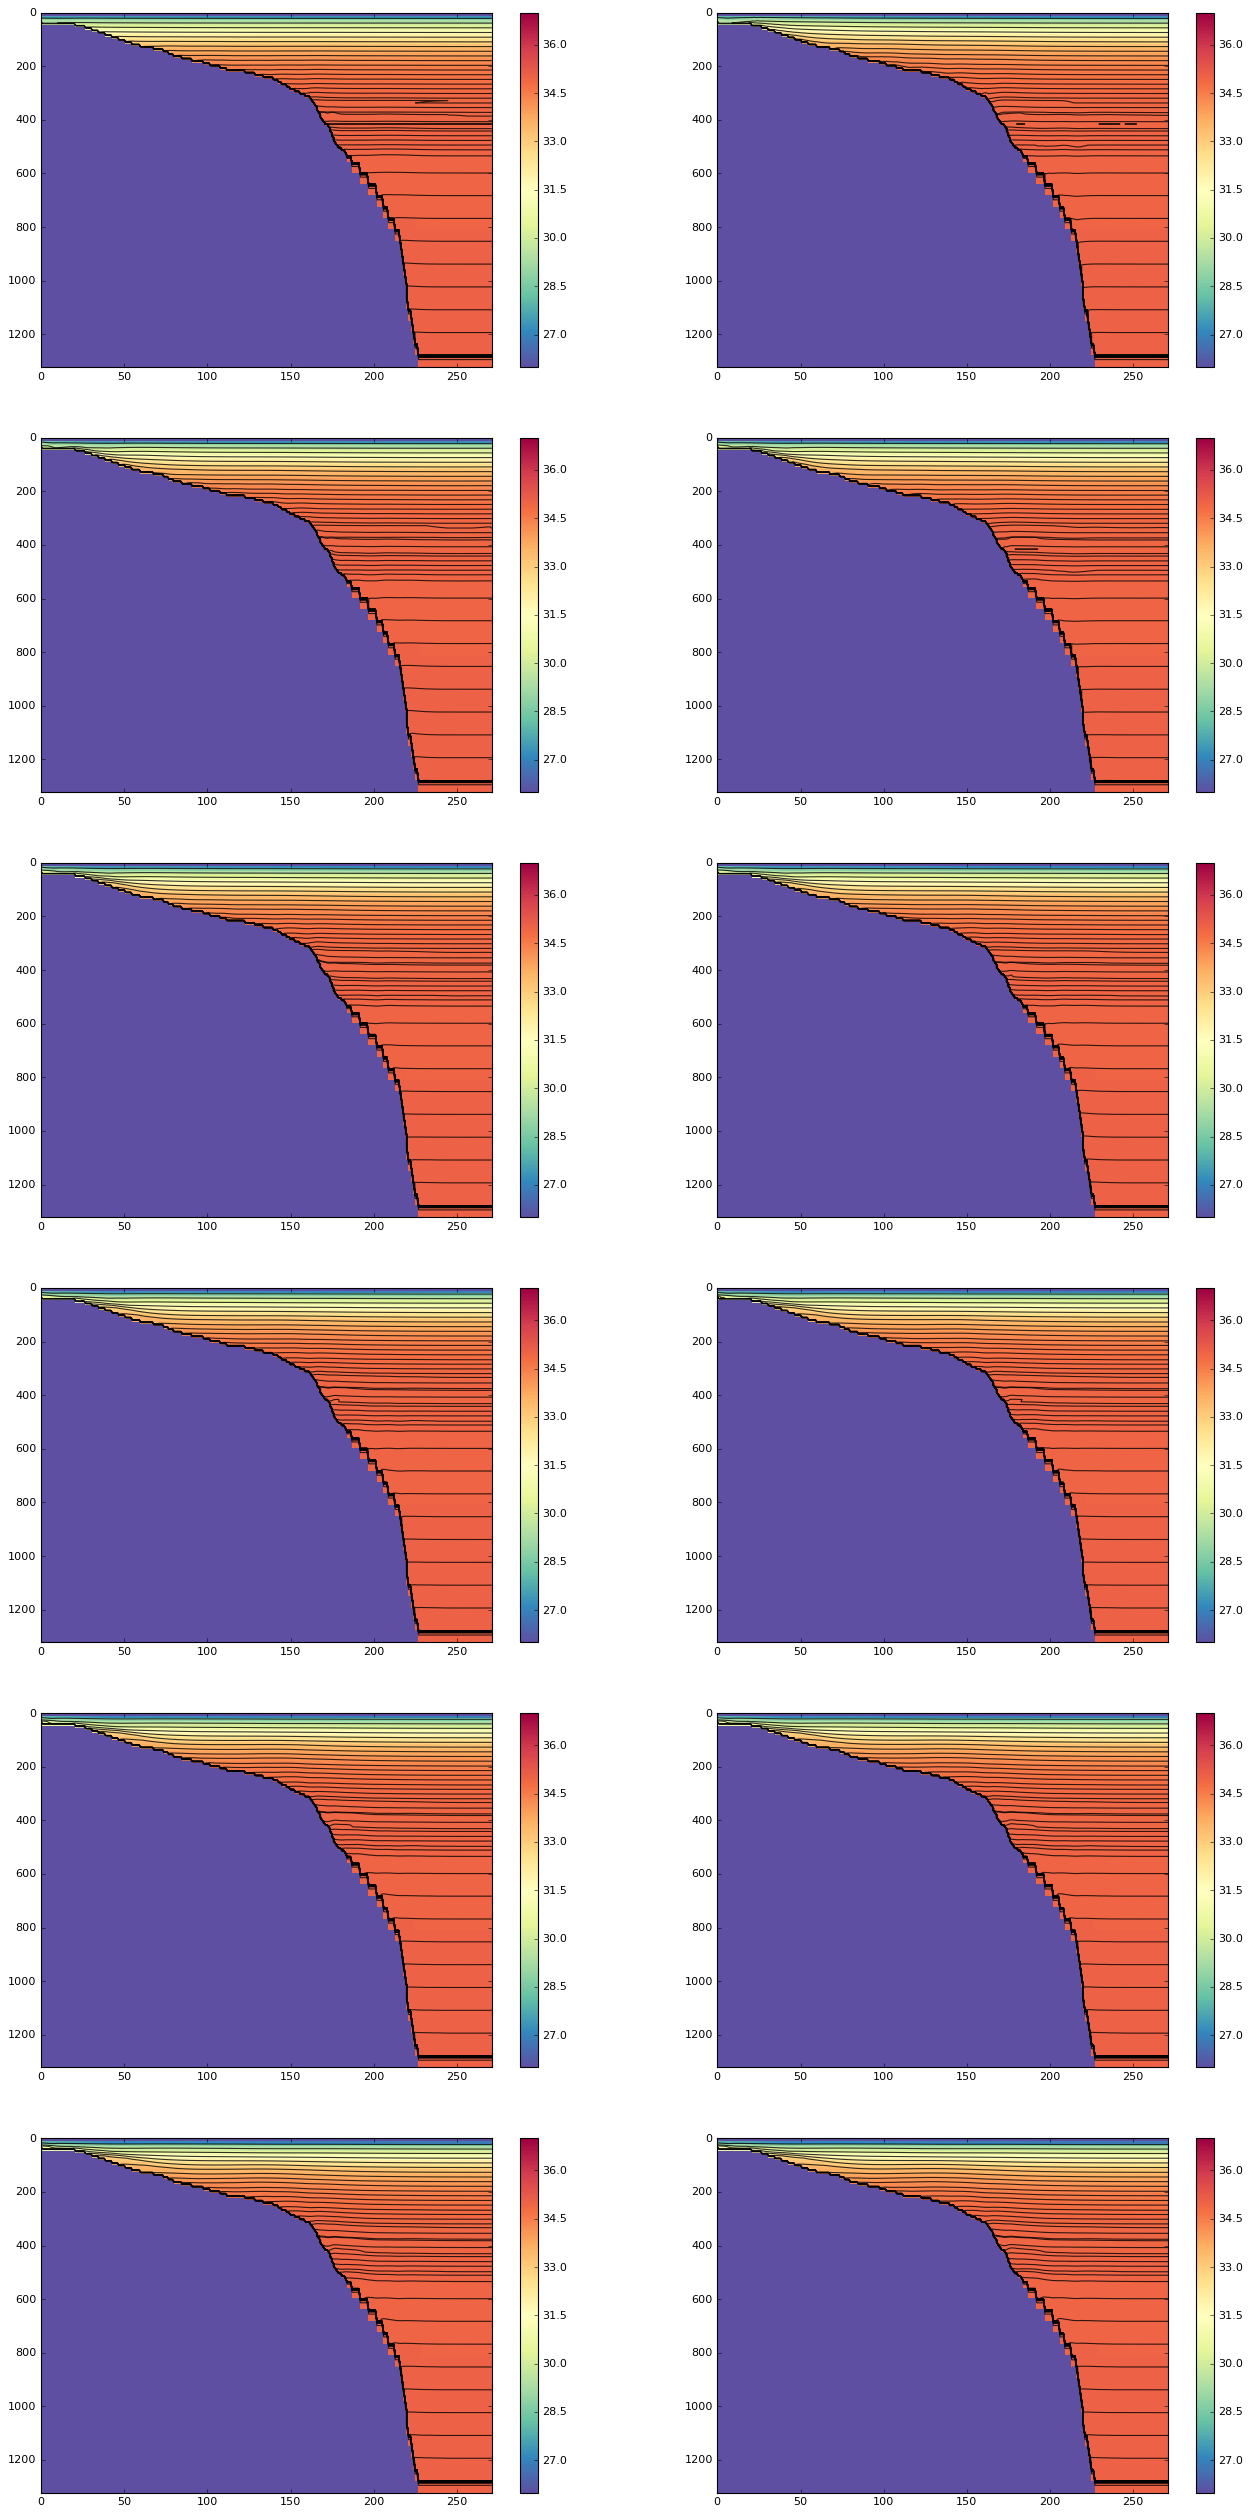

In [11]:
fig = plot_iso(vosaline_daily, deptht, 26, 37, levels)

# Real_base

In [12]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/real_base/'
vosaline, tmask, deptht = get_vars_cross(dirname, x_ind)

vosaline_daily = np.full((vosaline.shape[-3]/24, vosaline.shape[-2], vosaline.shape[-1]), np.nan)

for i in range(vosaline_daily.shape[0]):
    day_start, day_end = i, i+1
    vosaline_daily[i, :, :] = get_1day_avg(vosaline, day_start, day_end)

tmask_cross = np.tile(tmask[0, 0, :, :], (vosaline_daily.shape[0], 1, 1))

vosaline_daily_ma = np.ma.array(vosaline_daily, mask = 1 - tmask_cross)

22.8692779541 35.0613454183


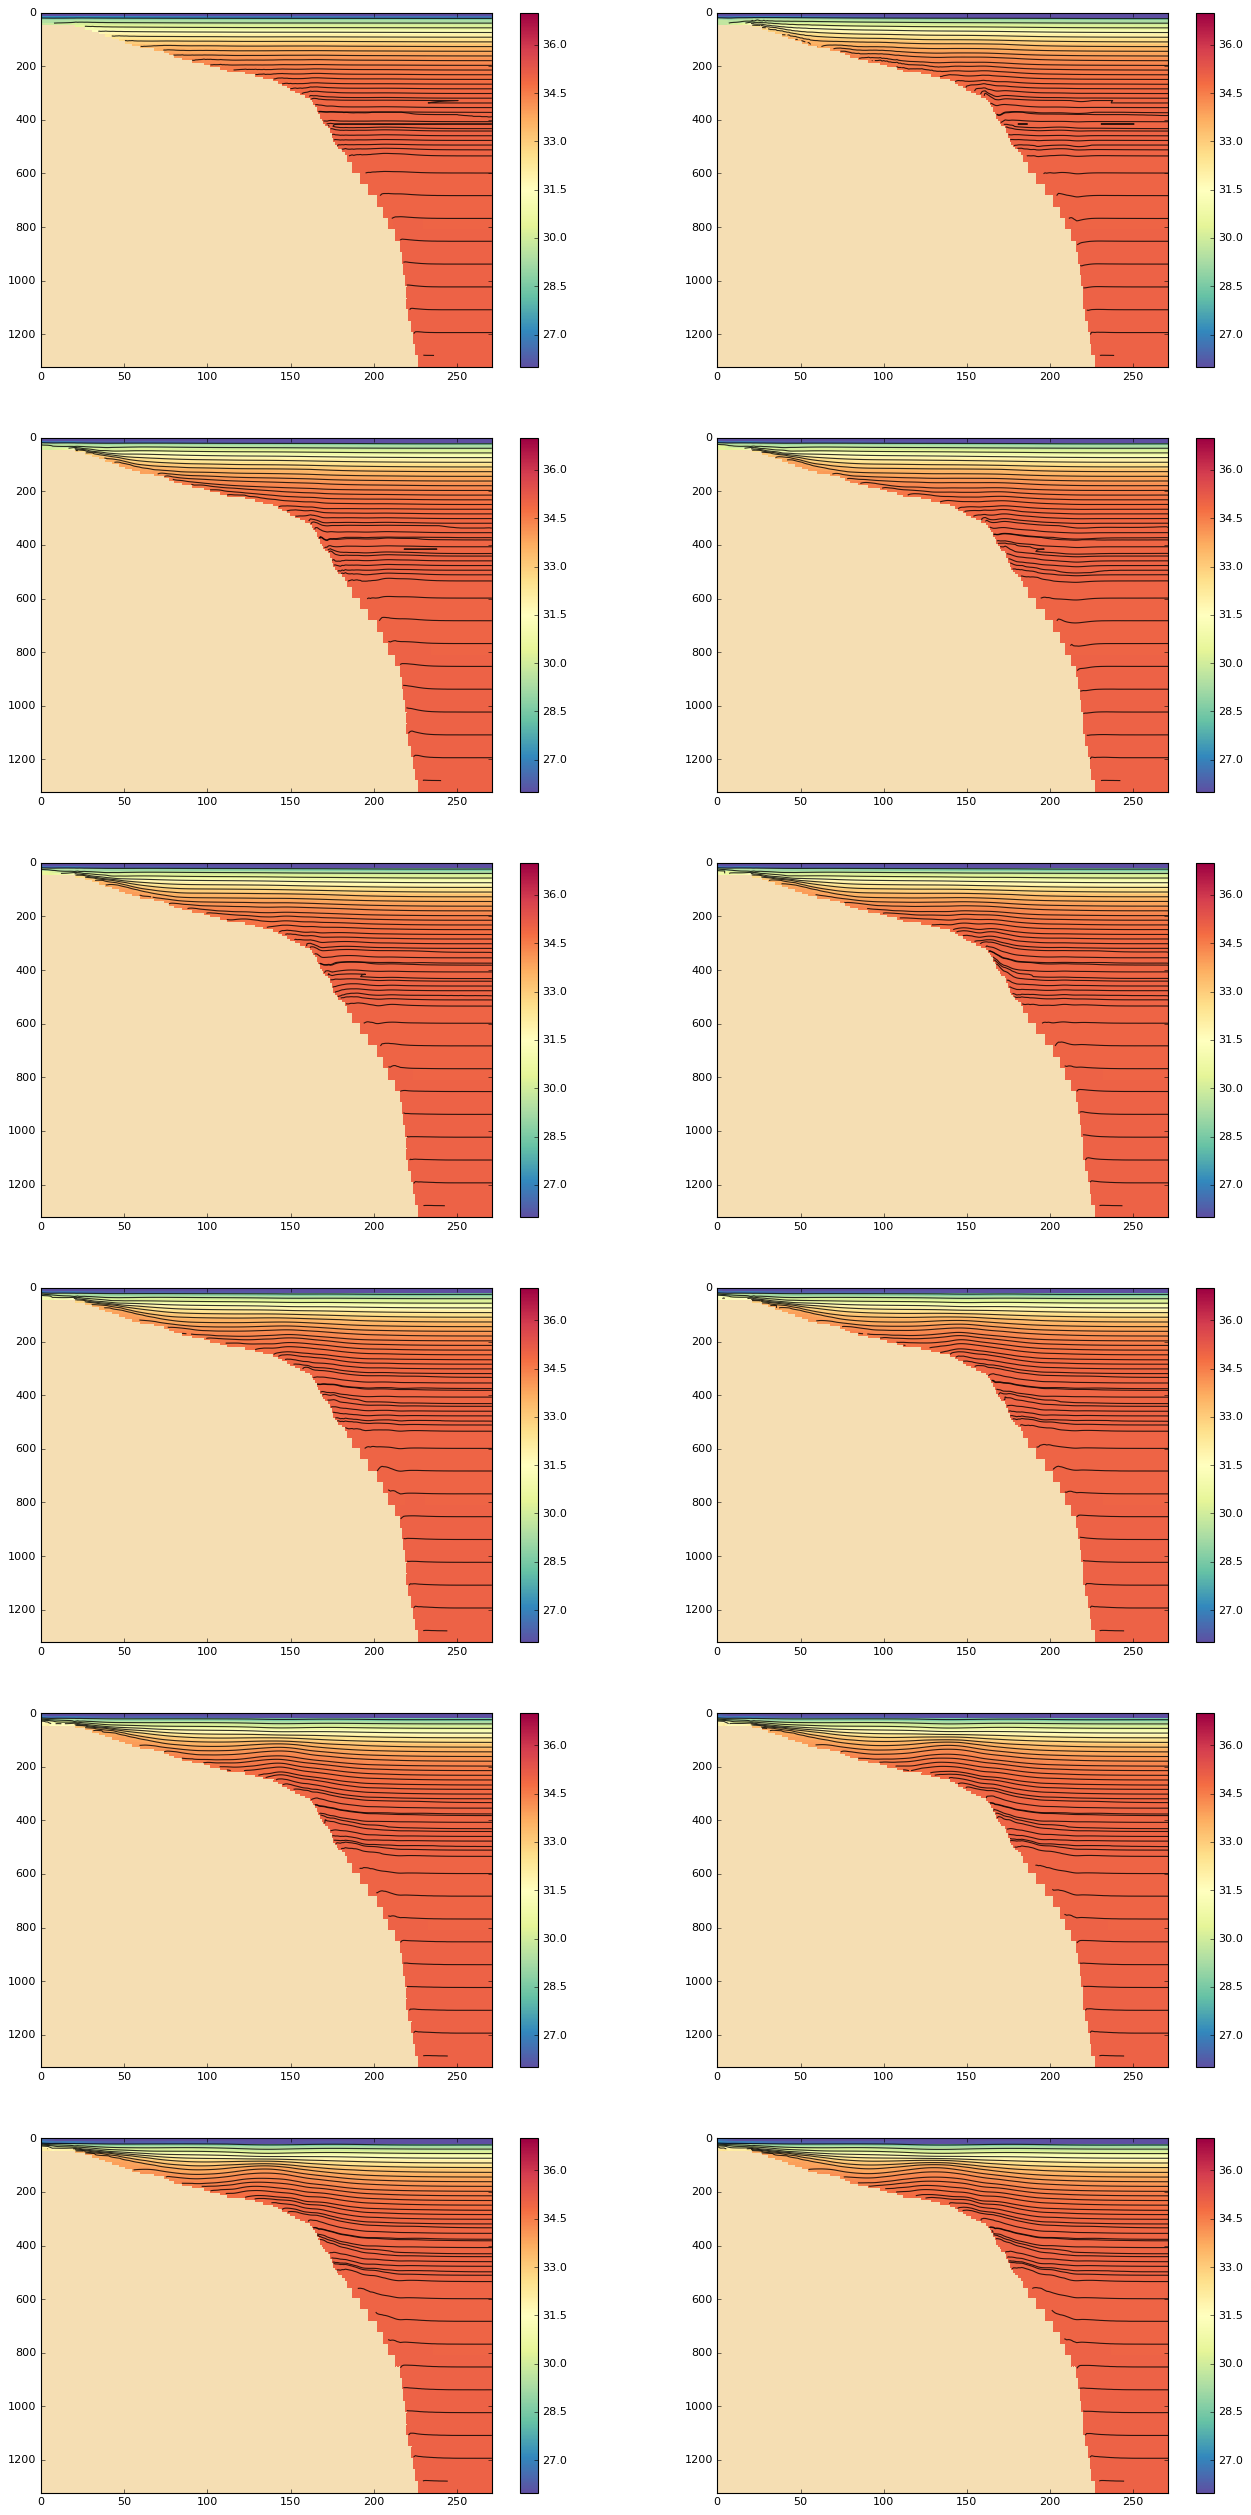

In [13]:
print(vosaline_daily_ma.min(), vosaline_daily_ma.max())

fig = plot_iso(vosaline_daily_ma, deptht, 26, 37, levels)

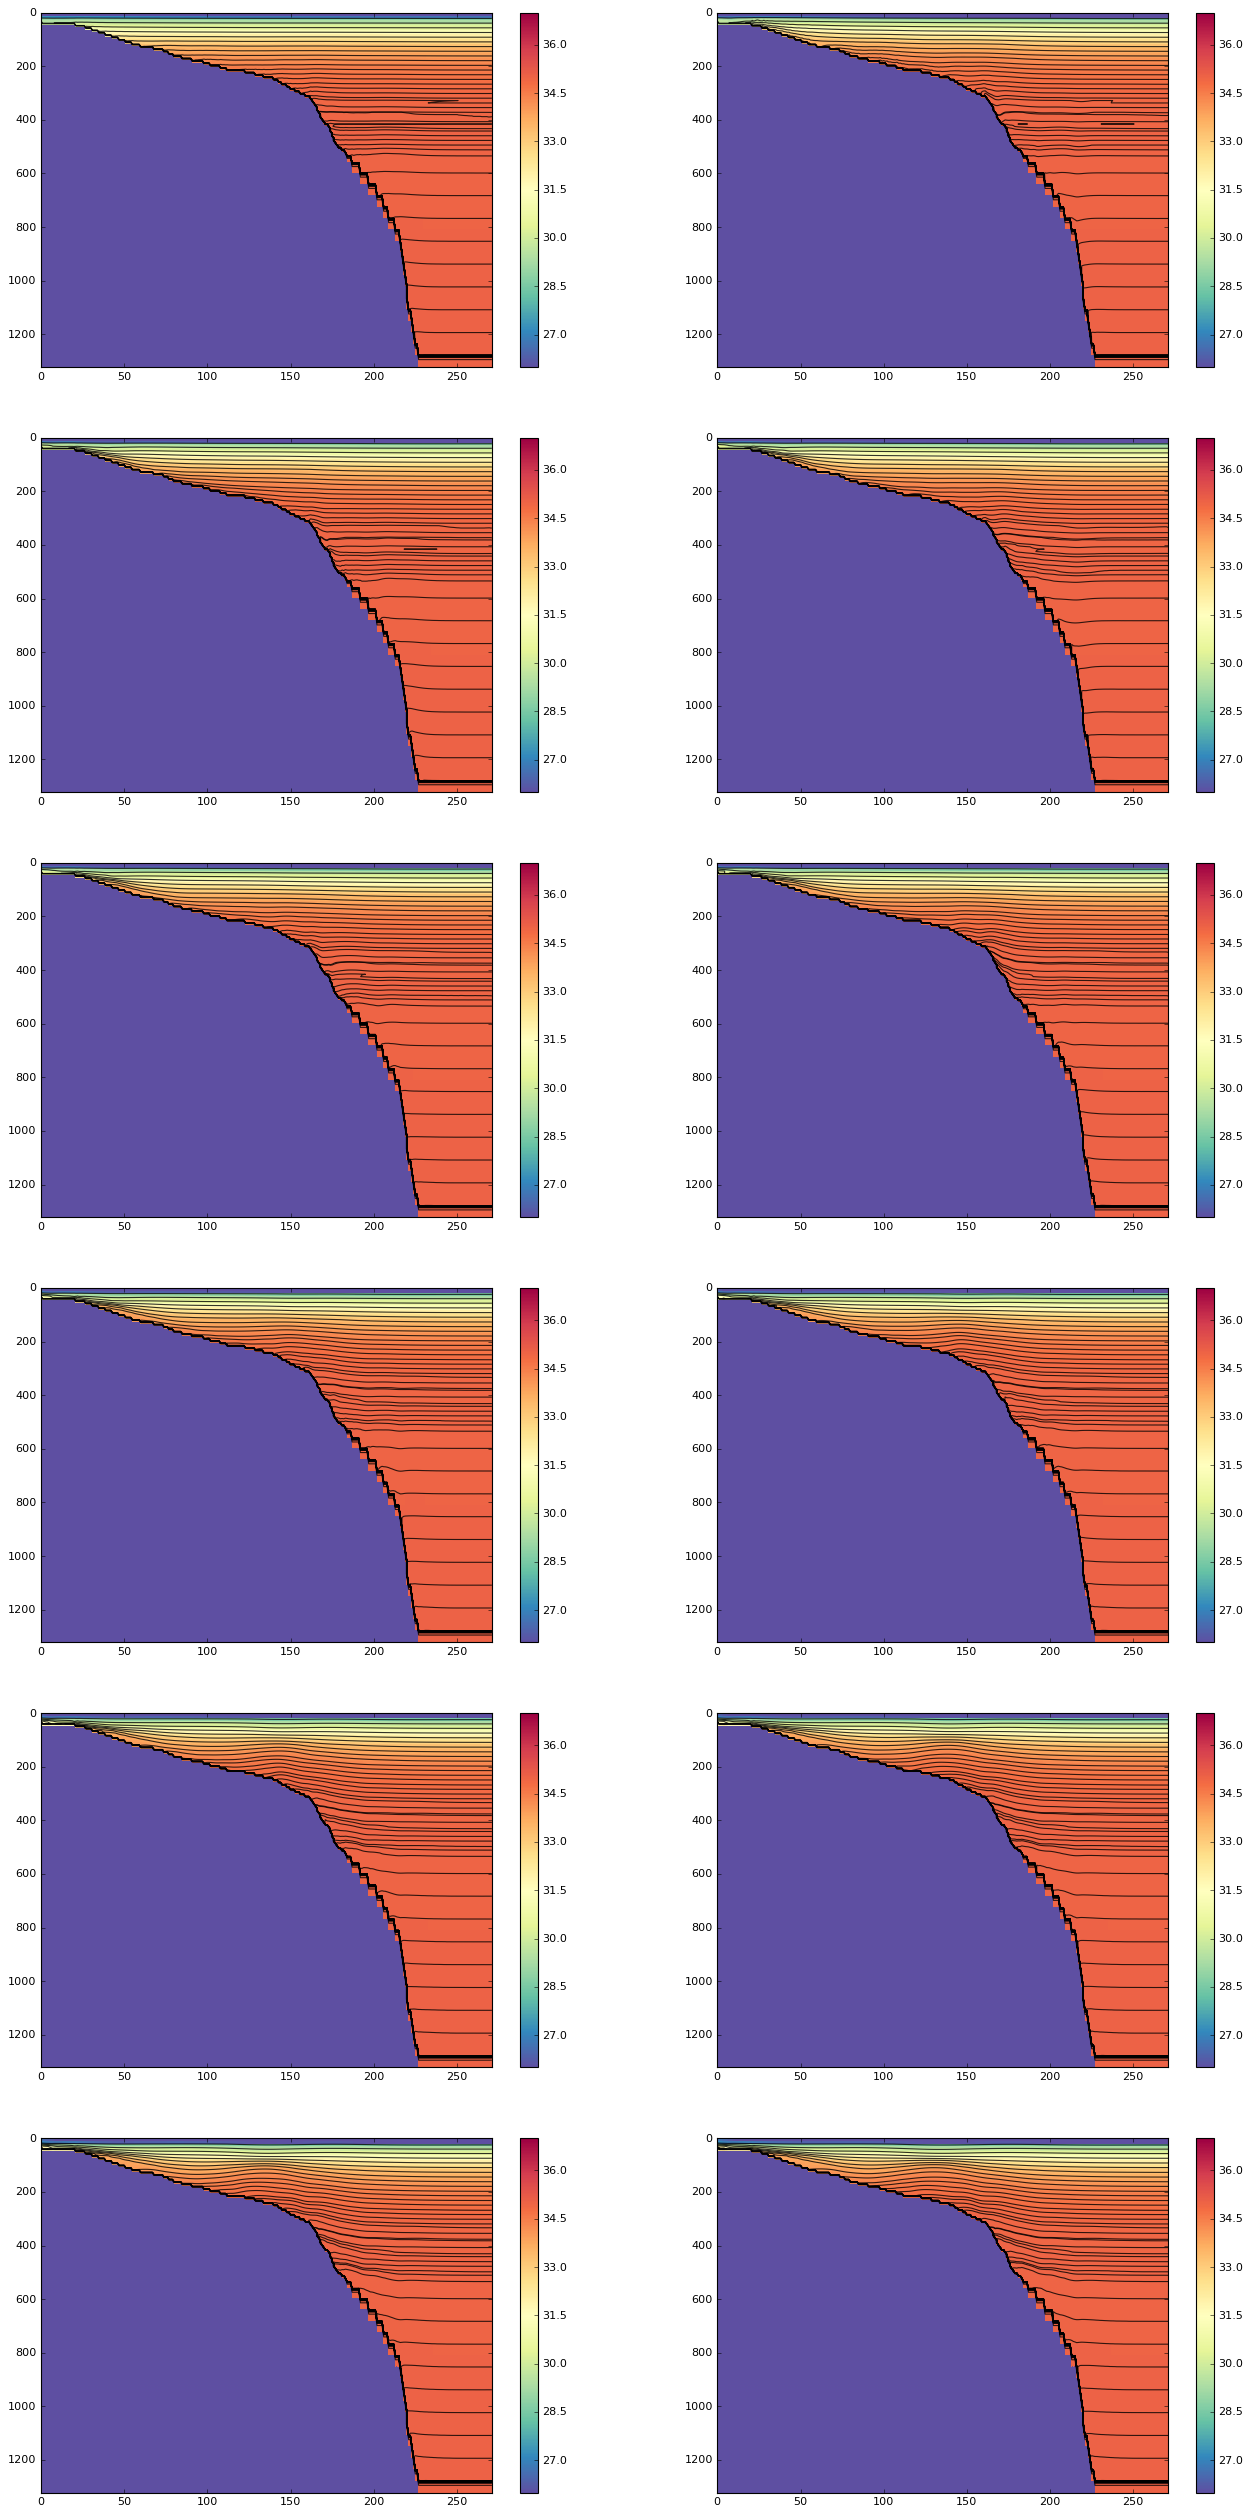

In [14]:
fig = plot_iso(vosaline_daily, deptht, 26, 37, levels)